### Load Dataset

In [1]:
data.raw = read.table("crabs.dat.txt", header = TRUE)

In [2]:
data.raw$color = factor(data.raw$color)
data.raw$y = factor(data.raw$y)

In [3]:
head(data.raw)

crab,sat,y,weight,width,color,spine
1,8,1,3.05,28.3,2,3
2,0,0,1.55,22.5,3,3
3,9,1,2.30,26.0,1,1
4,0,0,2.10,24.8,3,3
5,4,1,2.60,26.0,3,3
6,0,0,2.10,23.8,2,3


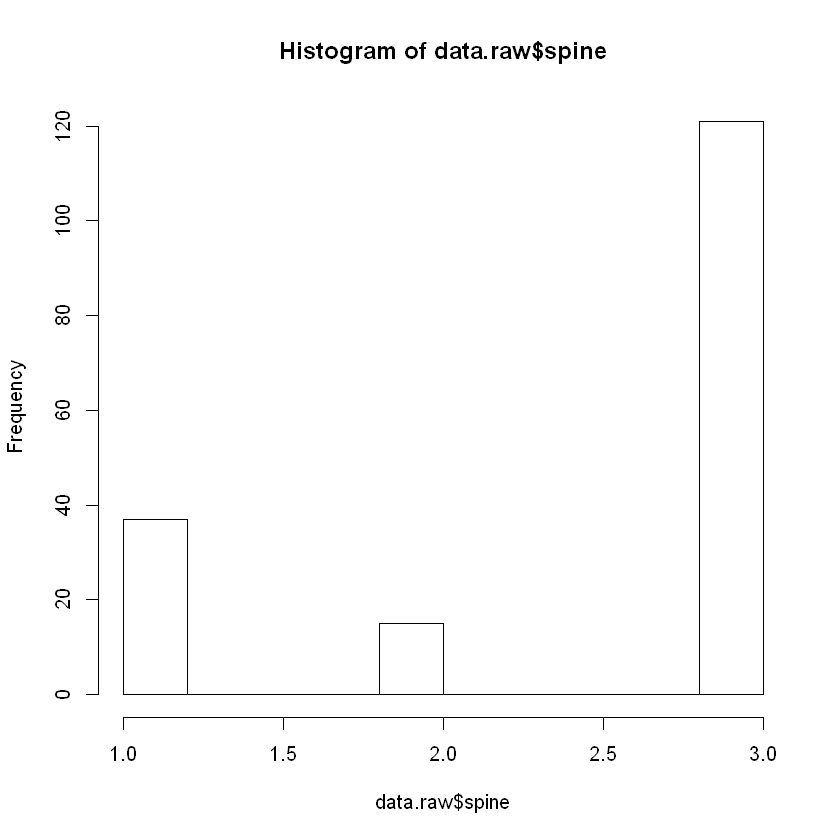

In [4]:
hist(data.raw$spine)

### Poisson Regression (First order models)

In [5]:
require(lmtest)

model.all_variables = glm(spine ~ sat + y + weight + width + color, family = poisson(link = log), data = data.raw)

Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [6]:
summary(model.all_variables)


Call:
glm(formula = spine ~ sat + y + weight + width + color, family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2842  -0.2786   0.1515   0.3177   1.3208  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.009538   0.978624  -0.010  0.99222   
sat         -0.007227   0.022171  -0.326  0.74444   
y1           0.091759   0.147520   0.622  0.53394   
weight      -0.132128   0.180487  -0.732  0.46413   
width        0.022427   0.049338   0.455  0.64942   
color2       0.581651   0.259186   2.244  0.02482 * 
color3       0.716702   0.268605   2.668  0.00763 **
color4       0.766032   0.284857   2.689  0.00716 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 44.605  on 165  degrees of freedom
AIC: 535.82

Number of Fisher Scoring iteratio

The model with all first order variables is not insightful, with most coefficients being insignificant. But it can be observed that the variables **color2**, **color3**, and **color4** are all significant at the 0.05 level.  

The reason for this can be reasonably understood by observing the histogram of spine for each color.

In [3]:
model.color = glm(spine ~ color, family = poisson(link = log), data = data.raw)
model.weight = glm(spine ~ weight, family = poisson(link = log), data = data.raw)
model.width = glm(spine ~ width, family = poisson(link = log), data = data.raw)
model.sat = glm(spine ~ sat, family = poisson(link = log), data = data.raw)
model.y = glm(spine ~ y, family = poisson(link = log), data = data.raw)

We now start with a very simplistic model with only one predictor, ie. the **color** variable.

In [12]:
summary(model.color)
print(lrtest(model.color))
print(lrtest(model.weight))
print(lrtest(model.width))
print(lrtest(model.y))


Call:
glm(formula = spine ~ color, family = poisson(link = log), data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2740  -0.2725   0.1347   0.3656   1.2378  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.2877     0.2500   1.151  0.24984   
color2        0.5922     0.2586   2.290  0.02202 * 
color3        0.7321     0.2659   2.754  0.00589 **
color4        0.7644     0.2800   2.731  0.00632 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.604  on 169  degrees of freedom
AIC: 528.82

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color
Model 2: spine ~ 1
  #Df  LogLik Df  Chisq Pr(>Chisq)  
1   4 -260.41                       
2   1 -265.69 -3 10.553    0.01441 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Likelihood ratio test

Model 1: spine ~ weight
Model 2: spine ~ 1
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   2 -265.03                     
2   1 -265.69 -1 1.3237     0.2499
Likelihood ratio test

Model 1: spine ~ width
Model 2: spine ~ 1
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   2 -265.34                     
2   1 -265.69 -1 0.7038     0.4015
Likelihood ratio test

Model 1: spine ~ y
Model 2: spine ~ 1
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   2 -265.67                     
2   1 -265.69 -1 0.0363     0.8489


In [13]:
model.color.weight = glm(spine ~ color + weight, family = poisson(link = log), data = data.raw)
summary(model.color.weight)
print(lrtest(model.color.weight, model.color))


Call:
glm(formula = spine ~ color + weight, family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2336  -0.2930   0.1252   0.3479   1.2362  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.41312    0.33885   1.219  0.22278   
color2       0.58754    0.25874   2.271  0.02316 * 
color3       0.71621    0.26751   2.677  0.00742 **
color4       0.74259    0.28279   2.626  0.00864 **
weight      -0.04777    0.08722  -0.548  0.58389   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.302  on 168  degrees of freedom
AIC: 530.52

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color + weight
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   5 -260.26                     
2   4 -260.41 -1 0.3017     0.5828


In [14]:
model.color.width = glm(spine ~ color + width, family = poisson(link = log), data = data.raw)
summary(model.color.width)
print(lrtest(model.color.width, model.color))


Call:
glm(formula = spine ~ color + width, family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2723  -0.2894   0.1335   0.3599   1.2299  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.425026   0.689211   0.617  0.53744   
color2       0.590799   0.258667   2.284  0.02237 * 
color3       0.725937   0.267479   2.714  0.00665 **
color4       0.755816   0.282830   2.672  0.00753 **
width       -0.005094   0.023829  -0.214  0.83071   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.558  on 168  degrees of freedom
AIC: 530.78

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color + width
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   5 -260.39                     
2   4 -260.41 -1 0.0458     0.8306


In [15]:
model.color.sat = glm(spine ~ color + sat, family = poisson(link = log), data = data.raw)
summary(model.color.sat)
print(lrtest(model.color.sat, model.color))


Call:
glm(formula = spine ~ color + sat, family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2780  -0.2791   0.1319   0.3628   1.2305  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.293136   0.258074   1.136  0.25601   
color2       0.591107   0.258884   2.283  0.02241 * 
color3       0.729669   0.267481   2.728  0.00637 **
color4       0.761681   0.281789   2.703  0.00687 **
sat         -0.001338   0.015732  -0.085  0.93223   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.597  on 168  degrees of freedom
AIC: 530.82

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color + sat
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   5 -260.41                     
2   4 -260.41 -1 0.0072     0.9322


In [16]:
model.color.y = glm(spine ~ color + y, family = poisson(link = log), data = data.raw)
summary(model.color.y)
print(lrtest(model.color.y, model.color))


Call:
glm(formula = spine ~ color + y, family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2558  -0.2701   0.1082   0.3487   1.2770  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.25846    0.26233   0.985  0.32449   
color2       0.59307    0.25860   2.293  0.02182 * 
color3       0.73828    0.26640   2.771  0.00558 **
color4       0.78113    0.28357   2.755  0.00588 **
y1           0.03877    0.10495   0.369  0.71182   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.467  on 168  degrees of freedom
AIC: 530.69

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color + y
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   5 -260.34                     
2   4 -260.41 -1 0.1369     0.7114


Adding any other variables (first order) does not improve the model significantly at all. This can be confirmed from all the likelihood ratio tests.  Also, by adding any of the real valued predictors, the residual deviance decreases at most only by 0.3, while a +2 increase in AIC.   

We now check the pseudo-R-squared goodness of fit, and diagnostic plots of **spine ~ color**.

In [17]:
# Pseudo-R-squared
pseudo_R_squared <- function(mod) {
    return (1 - (mod$deviance)/(mod$null.deviance))
}

pseudo_R_squared(model.color)
pseudo_R_squared(model.color.weight)
pseudo_R_squared(model.color.width)
pseudo_R_squared(model.color.sat)
pseudo_R_squared(model.color.y)

[1] 0.1879178

[1] 0.1932909

[1] 0.1887325

[1] 0.1880468

[1] 0.190356

### Goodness of fit 

#### Pearson chi-square test

In [4]:
pearson_chisquare_test <- function(mod) {
    pearson_chisqr_statistic = sum(residuals(mod, type = "pearson")^2)
    print(pearson_chisqr_statistic)
    p.value = 1 - pchisq(pearson_chisqr_statistic, nrow(data.raw) - length(mod$coefficients))
    print(nrow(data.raw) - length(mod$coefficients))
    return (p.value)
}

pearson_chisquare_test(model.color)

[1] 39.50378
[1] 169


[1] 1

#### Deviance / log likelihood ratio test

In [19]:
# Deviance test
deviance_test <- function(mod) {
    return ((pchisq(mod$deviance, df=mod$df.residual, lower.tail=FALSE)))
}

deviance_test(model.color)
deviance_test(model.color.width)
deviance_test(model.color.weight)
deviance_test(model.color.sat)
deviance_test(model.color.y)

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

The Pearson chi-square, deviance goodness of fit tests show that all models tested above are well fit, but the results are not useful for comparing between them.

### Diagnostics

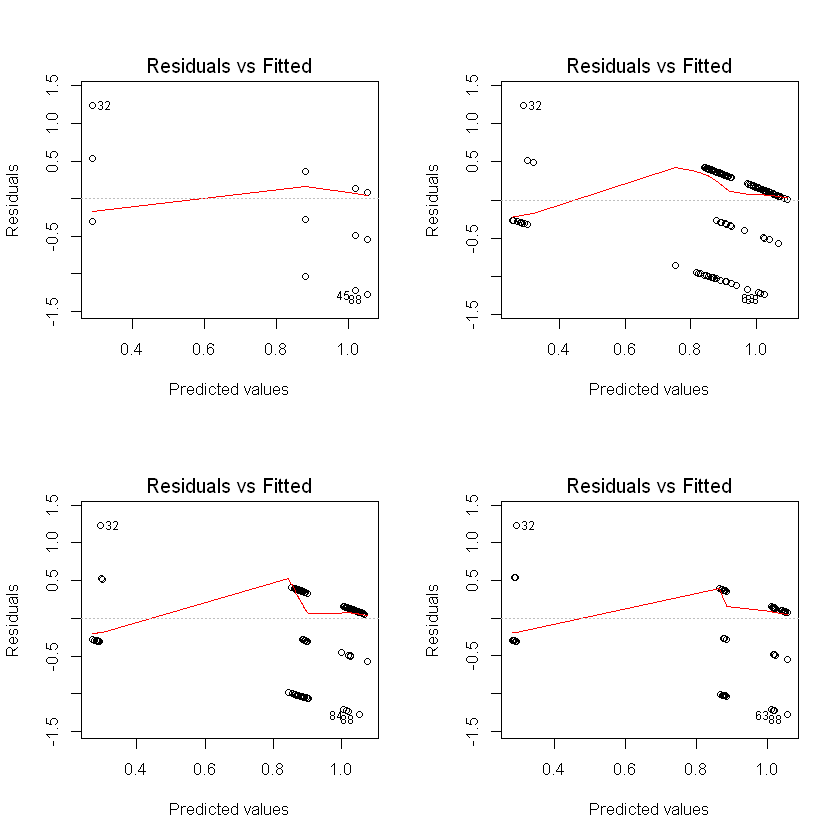

In [20]:
par(mfrow = c(2,2))
plot(model.color, which = 1)
plot(model.color.weight, which = 1)
plot(model.color.width, which = 1)
plot(model.color.sat, which = 1)

Loading required package: carData


[1] 32 88

[1] 32 88

[1] 32 88

[1] 32 88

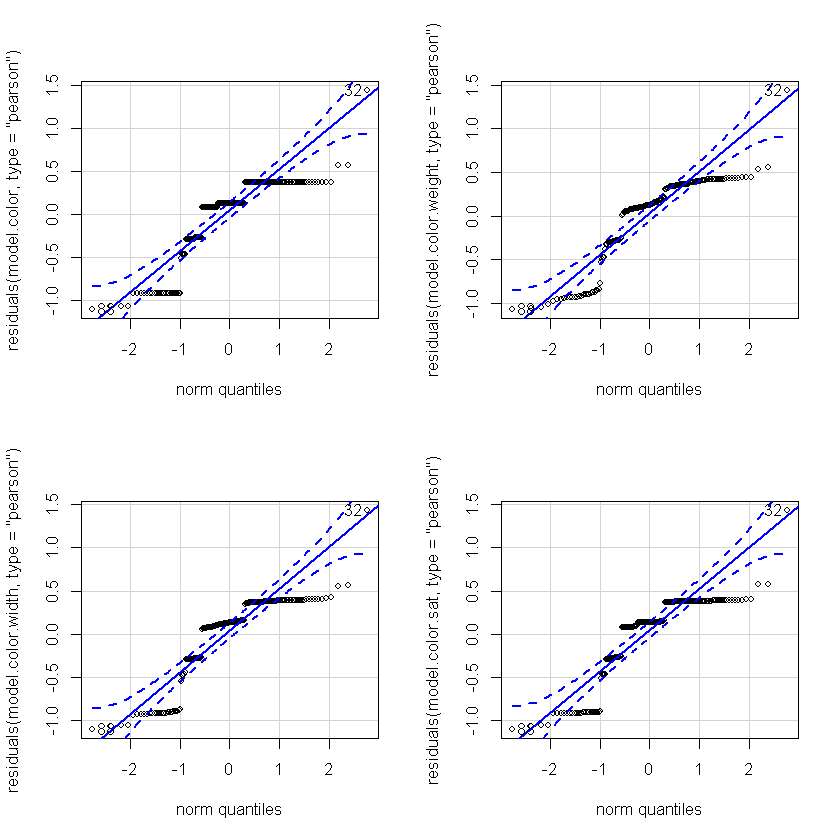

In [21]:
library(car)

par(mfrow = c(2,2))
qqPlot(residuals(model.color, type = "pearson"))
qqPlot(residuals(model.color.weight, type = "pearson"))
qqPlot(residuals(model.color.width, type = "pearson"))
qqPlot(residuals(model.color.sat, type = "pearson"))

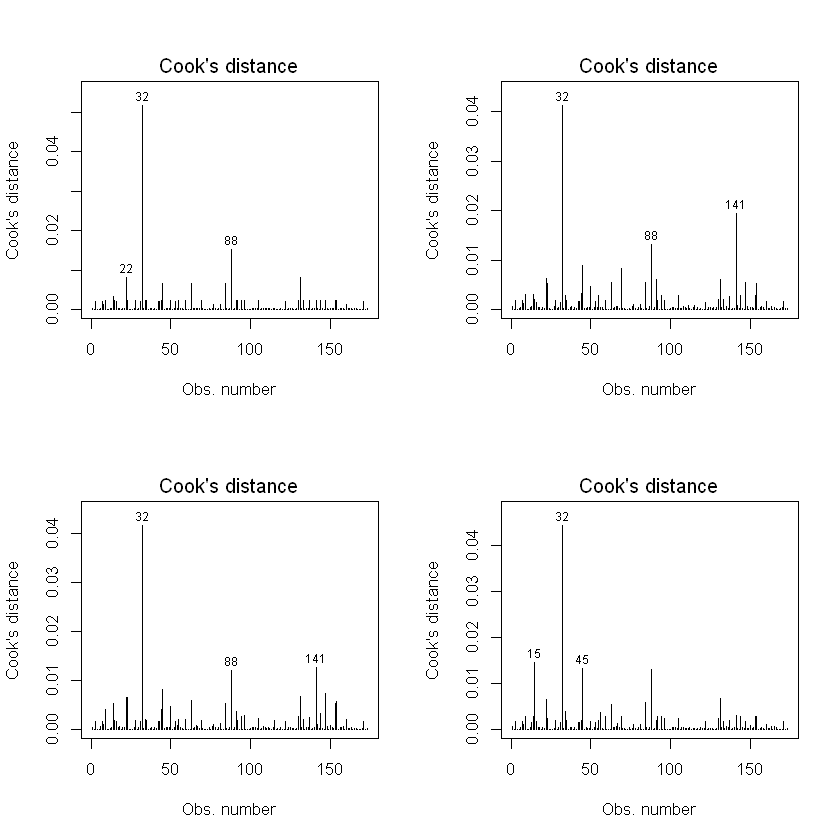

In [22]:
par(mfrow = c(2,2))
plot(model.color, which = 4)
plot(model.color.weight, which = 4)
plot(model.color.width, which = 4)
plot(model.color.sat, which = 4)

32th data seems to be an outlier, we will try fitting the model without this data point.

### Trying models with transformed variables

In [23]:
model.color.powweight = glm(spine ~ color + I(weight^4.8), family = poisson(link = log), data = data.raw)
summary(model.color.powweight)
print(lrtest(model.color.powweight, model.color))
pseudo_R_squared(model.color.powweight)


Call:
glm(formula = spine ~ color + I(weight^4.8), family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2371  -0.3039   0.1090   0.3179   1.2262  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)    0.3318910  0.2527297   1.313  0.18911   
color2         0.5971491  0.2585911   2.309  0.02093 * 
color3         0.7182215  0.2661531   2.699  0.00696 **
color4         0.7414534  0.2806138   2.642  0.00824 **
I(weight^4.8) -0.0003627  0.0003069  -1.182  0.23734   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 43.857  on 168  degrees of freedom
AIC: 529.08

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color + I(weight^4.8)
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   5 -259.54                     
2   4 -260.41 -1 1.7472     0.1862


[1] 0.2190303

In [24]:
model.color.powwidth = glm(spine ~ color + I(width^20), family = poisson(link = log), data = data.raw)
summary(model.color.powwidth)
print(lrtest(model.color.powwidth, model.color))
pseudo_R_squared(model.color.powwidth)


Call:
glm(formula = spine ~ color + I(width^20), family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2790  -0.3086   0.1234   0.3290   1.2166  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  3.077e-01  2.507e-01   1.227  0.21970   
color2       5.997e-01  2.586e-01   2.319  0.02040 * 
color3       7.224e-01  2.660e-01   2.716  0.00662 **
color4       7.512e-01  2.802e-01   2.681  0.00735 **
I(width^20) -2.498e-31  2.392e-31  -1.044  0.29640   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 44.284  on 168  degrees of freedom
AIC: 529.5

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color + I(width^20)
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   5 -259.75                     
2   4 -260.41 -1 1.3195     0.2507


[1] 0.2114149

### Adding interactions

In [25]:
model.weight.colorweight = glm(spine ~ weight + color:weight, family = poisson(link = log), data = data.raw)
summary(model.weight.colorweight)
print(lrtest(model.weight.colorweight, model.weight))
pseudo_R_squared(model.weight.colorweight)


Call:
glm(formula = spine ~ weight + color:weight, family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2632  -0.2857   0.1465   0.3297   1.2479  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.05231    0.21636   4.864 1.15e-06 ***
weight        -0.29698    0.12629  -2.352  0.01869 *  
weight:color2  0.23164    0.09943   2.330  0.01982 *  
weight:color3  0.27861    0.10383   2.683  0.00729 ** 
weight:color4  0.29420    0.11255   2.614  0.00895 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.287  on 168  degrees of freedom
AIC: 530.51

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ weight + color:weight
Model 2: spine ~ weight
  #Df  LogLik Df  Chisq Pr(>Chisq)  
1   5 -260.25                       
2   2 -265.03 -3 9.5461    0.02285 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 0.1935614

In [26]:
model.color.weight.width.weightwidth.colorwidth = glm(spine ~ color + weight + width + width:weight + color:width, family = poisson(link = log), data = data.raw)
summary(model.color.weight.width.weightwidth.colorwidth)
print(lrtest(model.color.weight.width.weightwidth.colorwidth, model.color))
pseudo_R_squared(model.color.weight.width.weightwidth.colorwidth)


Call:
glm(formula = spine ~ color + weight + width + width:weight + 
    color:width, family = poisson(link = log), data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3010  -0.1164   0.1191   0.3026   1.0047  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)   1.01513    5.26761   0.193    0.847
color2       -4.48879    4.64509  -0.966    0.334
color3       -2.75408    4.76476  -0.578    0.563
color4       -3.49970    4.93630  -0.709    0.478
weight        1.31447    1.04344   1.260    0.208
width        -0.01709    0.19961  -0.086    0.932
weight:width -0.05270    0.03761  -1.401    0.161
color2:width  0.19106    0.17467   1.094    0.274
color3:width  0.12978    0.17957   0.723    0.470
color4:width  0.15968    0.18686   0.855    0.393

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 41.332  on 163  degrees of freedom
AIC: 536.55

Number o

Likelihood ratio test

Model 1: spine ~ color + weight + width + width:weight + color:width
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1  10 -258.27                     
2   4 -260.41 -6 4.2722     0.6399


[1] 0.2639944

In [27]:
model.color.colory = glm(spine ~ color + color:y, family = poisson(link = log), data = data.raw)
summary(model.color.colory)
print(lrtest(model.color.colory, model.color))
pseudo_R_squared(model.color.colory)


Call:
glm(formula = spine ~ color + color:y, family = poisson(link = log), 
    data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2413  -0.2076   0.1841   0.3112   0.9274  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.51083    0.44721   1.142    0.253
color2       0.27413    0.46641   0.588    0.557
color3       0.55005    0.46821   1.175    0.240
color4       0.51879    0.47308   1.097    0.273
color1:y1   -0.31015    0.53935  -0.575    0.565
color2:y1    0.12843    0.15283   0.840    0.401
color3:y1   -0.07047    0.18308  -0.385    0.700
color4:y1    0.06899    0.26726   0.258    0.796

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 44.352  on 165  degrees of freedom
AIC: 535.57

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color + color:y
Model 2: spine ~ color
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   8 -259.79                     
2   4 -260.41 -4 1.2522     0.8694


[1] 0.2102158

### Backwards elimination

In [29]:
library(MASS)
model.all_variables.backward =  stepAIC(model.all_variables, direction = "backward")
summary(model.all_variables.backward)
print(lrtest(model.all_variables.backward, model.color))
pseudo_R_squared(model.all_variables.backward)

Start:  AIC=535.82
spine ~ sat + y + weight + width + color

         Df Deviance    AIC
- sat     1   44.712 533.93
- width   1   44.810 534.03
- y       1   44.991 534.21
- weight  1   45.135 534.35
<none>        44.605 535.82
- color   3   54.401 539.62

Step:  AIC=533.93
spine ~ y + weight + width + color

         Df Deviance    AIC
- width   1   44.941 532.16
- y       1   45.001 532.22
- weight  1   45.326 532.55
<none>        44.712 533.93
- color   3   54.637 537.86

Step:  AIC=532.16
spine ~ y + weight + color

         Df Deviance    AIC
- y       1   45.302 530.52
- weight  1   45.467 530.69
<none>        44.941 532.16
- color   3   54.756 535.98

Step:  AIC=530.52
spine ~ weight + color

         Df Deviance    AIC
- weight  1   45.604 528.82
<none>        45.302 530.52
- color   3   54.833 534.05

Step:  AIC=528.82
spine ~ color

        Df Deviance    AIC
<none>       45.604 528.82
- color  3   56.157 533.38



Call:
glm(formula = spine ~ color, family = poisson(link = log), data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2740  -0.2725   0.1347   0.3656   1.2378  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.2877     0.2500   1.151  0.24984   
color2        0.5922     0.2586   2.290  0.02202 * 
color3        0.7321     0.2659   2.754  0.00589 **
color4        0.7644     0.2800   2.731  0.00632 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.604  on 169  degrees of freedom
AIC: 528.82

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color
Model 2: spine ~ color
  #Df  LogLik Df Chisq Pr(>Chisq)
1   4 -260.41                    
2   4 -260.41  0     0          1


[1] 0.1879178

In [30]:
model.all_variables.second_order = glm(spine ~ (color + width + weight + y + sat + I(weight^4.8))^2, family = poisson(link = log), data = data.raw)
model.all_variables.second_order.backward =  stepAIC(model.all_variables.second_order, direction = "backward")
summary(model.all_variables.second_order.backward)
print(lrtest(model.all_variables.second_order.backward, model.color))
pseudo_R_squared(model.all_variables.second_order.backward)

Start:  AIC=576.87
spine ~ (color + width + weight + y + sat + I(weight^4.8))^2


Step:  AIC=576.87
spine ~ color + width + weight + y + sat + I(weight^4.8) + color:width + 
    color:weight + color:y + color:sat + color:I(weight^4.8) + 
    width:weight + width:y + width:sat + width:I(weight^4.8) + 
    weight:y + weight:sat + weight:I(weight^4.8) + y:I(weight^4.8) + 
    sat:I(weight^4.8)

                       Df Deviance    AIC
- color:y               3   36.037 571.26
- color:sat             3   36.054 571.27
- color:weight          3   36.585 571.80
- color:I(weight^4.8)   3   36.749 571.97
- color:width           3   37.296 572.51
- width:y               1   35.650 574.87
- width:sat             1   35.655 574.87
- sat:I(weight^4.8)     1   35.655 574.87
- weight:sat            1   35.656 574.87
- y:I(weight^4.8)       1   35.700 574.92
- weight:y              1   35.734 574.95
- width:I(weight^4.8)   1   36.060 575.28
- width:weight          1   36.129 575.35
- weight:I(weight


Step:  AIC=538.66
spine ~ color + width + weight + y + I(weight^4.8) + width:weight + 
    width:I(weight^4.8) + weight:I(weight^4.8)

                       Df Deviance    AIC
- y                     1   41.546 536.76
- width:I(weight^4.8)   1   42.103 537.32
- width:weight          1   42.247 537.47
- weight:I(weight^4.8)  1   42.570 537.79
<none>                      41.444 538.66
- color                 3   52.133 543.35

Step:  AIC=536.76
spine ~ color + width + weight + I(weight^4.8) + width:weight + 
    width:I(weight^4.8) + weight:I(weight^4.8)

                       Df Deviance    AIC
- width:I(weight^4.8)   1   42.251 535.47
- width:weight          1   42.406 535.63
- weight:I(weight^4.8)  1   42.745 535.96
<none>                      41.546 536.76
- color                 3   52.135 541.35

Step:  AIC=535.47
spine ~ color + width + weight + I(weight^4.8) + width:weight + 
    weight:I(weight^4.8)

                       Df Deviance    AIC
- width:weight          1   42.410


Call:
glm(formula = spine ~ color, family = poisson(link = log), data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2740  -0.2725   0.1347   0.3656   1.2378  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.2877     0.2500   1.151  0.24984   
color2        0.5922     0.2586   2.290  0.02202 * 
color3        0.7321     0.2659   2.754  0.00589 **
color4        0.7644     0.2800   2.731  0.00632 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.604  on 169  degrees of freedom
AIC: 528.82

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color
Model 2: spine ~ color
  #Df  LogLik Df Chisq Pr(>Chisq)
1   4 -260.41                    
2   4 -260.41  0     0          1


[1] 0.1879178

### Forward and Backward selection

In [31]:
model.all_variables.forwardbackward =  stepAIC(model.all_variables, direction = "both")
summary(model.all_variables.forwardbackward)
print(lrtest(model.all_variables.forwardbackward, model.color))
pseudo_R_squared(model.all_variables.forwardbackward)

Start:  AIC=535.82
spine ~ sat + y + weight + width + color

         Df Deviance    AIC
- sat     1   44.712 533.93
- width   1   44.810 534.03
- y       1   44.991 534.21
- weight  1   45.135 534.35
<none>        44.605 535.82
- color   3   54.401 539.62

Step:  AIC=533.93
spine ~ y + weight + width + color

         Df Deviance    AIC
- width   1   44.941 532.16
- y       1   45.001 532.22
- weight  1   45.326 532.55
<none>        44.712 533.93
+ sat     1   44.605 535.82
- color   3   54.637 537.86

Step:  AIC=532.16
spine ~ y + weight + color

         Df Deviance    AIC
- y       1   45.302 530.52
- weight  1   45.467 530.69
<none>        44.941 532.16
+ width   1   44.712 533.93
+ sat     1   44.810 534.03
- color   3   54.756 535.98

Step:  AIC=530.52
spine ~ weight + color

         Df Deviance    AIC
- weight  1   45.604 528.82
<none>        45.302 530.52
+ y       1   44.941 532.16
+ width   1   45.001 532.22
+ sat     1   45.289 532.51
- color   3   54.833 534.05

Step:  AI


Call:
glm(formula = spine ~ color, family = poisson(link = log), data = data.raw)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2740  -0.2725   0.1347   0.3656   1.2378  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.2877     0.2500   1.151  0.24984   
color2        0.5922     0.2586   2.290  0.02202 * 
color3        0.7321     0.2659   2.754  0.00589 **
color4        0.7644     0.2800   2.731  0.00632 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 45.604  on 169  degrees of freedom
AIC: 528.82

Number of Fisher Scoring iterations: 4


Likelihood ratio test

Model 1: spine ~ color
Model 2: spine ~ color
  #Df  LogLik Df Chisq Pr(>Chisq)
1   4 -260.41                    
2   4 -260.41  0     0          1


[1] 0.1879178

### Check for overdispersion

In [118]:
library(AER)

print(dispersiontest(model.color,trafo=1))


	Overdispersion test

data:  model.color
z = -17.795, p-value = 1
alternative hypothesis: true alpha is greater than 0
sample estimates:
     alpha 
-0.7716545 



No significant sign of overdispersion.

### Cross Validation

In [111]:
as.character(formula(model.all_variables))
as.character(formula(model.color))
as.character(formula(model.sat)) 
as.character(formula(model.width)) 
as.character(formula(model.weight))
as.character(formula(model.color.width))
as.character(formula(model.color.weight))
as.character(formula(model.color.sat))
as.character(formula(model.color.y)) 
as.character(formula(model.all_variables.second_order))

[1] "spine ~ sat + y + weight + width + color"

[1] "spine ~ color"

[1] "spine ~ sat"

[1] "spine ~ width"

[1] "spine ~ weight"

[1] "spine ~ color + width"

[1] "spine ~ color + weight"

[1] "spine ~ color + sat"

[1] "spine ~ color + y"

[1] "spine ~ (color + width + weight + y + sat + I(weight^4.8))^2"

In [33]:
require(formula.tools)
require(boot)
options(warn=-1)


models <- list( 'spine ~ sat + y + weight + width + color' = model.all_variables,
                'spine ~ color' = model.color, 
                'spine ~ sat' = model.sat, 
                'spine ~ width' = model.width, 
                'spine ~ weight' = model.weight, 
                'spine ~ color + width' = model.color.width,
                'spine ~ color + weight' = model.color.weight, 
                'spine ~ color + sat' = model.color.sat, 
                'spine ~ color + y' = model.color.y, 
                'spine ~ y' = model.y,
                'spine ~ weight + weight:color' = model.weight.colorweight,
                'spine ~ (color + width + weight + y + sat + I(weight^4.8))^2' = model.all_variables.second_order)

crossValidation <- function(mod) {
    set.seed(12345)
    rawError = signif(cv.glm(data.raw[, 2:7], mod, K = 10)$delta[1], 3)
    adjustedError = signif(cv.glm(data.raw[, 2:7], mod, K = 10)$delta[2], 3)
    c(rawCVError=rawError, adjustedCVError=adjustedError)
}

print(sapply(models, crossValidation, simplify = FALSE))


$`spine ~ sat + y + weight + width + color`
     rawCVError adjustedCVError 
          0.600           0.588 

$`spine ~ color`
     rawCVError adjustedCVError 
          0.572           0.568 

$`spine ~ sat`
     rawCVError adjustedCVError 
          0.696           0.686 

$`spine ~ width`
     rawCVError adjustedCVError 
          0.696           0.685 

$`spine ~ weight`
     rawCVError adjustedCVError 
          0.685           0.679 

$`spine ~ color + width`
     rawCVError adjustedCVError 
          0.589           0.577 

$`spine ~ color + weight`
     rawCVError adjustedCVError 
          0.585           0.577 

$`spine ~ color + sat`
     rawCVError adjustedCVError 
          0.584           0.572 

$`spine ~ color + y`
     rawCVError adjustedCVError 
          0.573           0.571 

$`spine ~ y`
     rawCVError adjustedCVError 
          0.693           0.690 

$`spine ~ weight + weight:color`
     rawCVError adjustedCVError 
          0.585           0.581 

$`spine ~ (

### Exhaustive enumeration of models

In [145]:
require(glmulti)

bestaicc = glmulti("spine", c("sat", "y", "weight", "width", "color"), crit = "aicc", data.raw[, 2:7], plotty = FALSE, 
                   family = poisson)
bestaic = glmulti("spine", c("sat", "y", "weight", "width", "color"), crit = "aic", data.raw[, 2:7], plotty = FALSE, 
                  family = poisson)

Initialization...
TASK: Exhaustive screening of candidate set.
Fitting...

After 50 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 536.592348008599

After 100 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 536.924003934236

After 150 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 536.397767811786

After 200 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 536.209947026705

After 250 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 535.519129220478

After 300 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 535.20431737767

After 350 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 535.170284637021

After 400 models:
Best model: spine~1+weight+color:weight
Crit= 530.865185465815
Mean crit= 534.85516903109

After 450 models:
Best model: spine~1+weight+col


After 4000 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4050 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4100 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4150 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4200 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4250 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4300 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4350 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4400 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4450 models:
Best model: spine~1+color
Crit= 529.060923973788
Mean crit= 533.311535208217

After 4500 models:
Best model


After 2750 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 2800 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 2850 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 2900 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 2950 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 3000 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 3050 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 3100 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.944463628289

After 3150 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.812972247131

After 3200 models:
Best model: spine~1+color
Crit= 528.822828735692
Mean crit= 532.793650101872

After 3250 models:
Best model

In [146]:
print(bestaicc)
"                            "
print(bestaic)

glmulti.analysis
Method: h / Fitting: glm / IC used: aicc
Level: 2 / Marginality: FALSE
From 100 models:
Best IC: 529.060923973788
Best model:
[1] "spine ~ 1 + color"
Evidence weight: 0.0686065616531146
Worst IC: 534.666367117624
6 models within 2 IC units.
88 models to reach 95% of evidence weight.


[1] "                            "

glmulti.analysis
Method: h / Fitting: glm / IC used: aic
Level: 2 / Marginality: FALSE
From 100 models:
Best IC: 528.822828735692
Best model:
[1] "spine ~ 1 + color"
Evidence weight: 0.0608683831682908
Worst IC: 533.988892819684
11 models within 2 IC units.
89 models to reach 95% of evidence weight.


This confirms that **spine ~ color** is indeed the best model.